In [4]:
import pygad
import string
import numpy as np


In [456]:
# Encryption Algorithm
def encryption(plainText, key):
    spaces = []
    for i in range(len((plainText.replace(' ', '')))):
        if plainText[i] == ' ':
            spaces.append(i)
    cipherText = ''
    alphabet = list(string.ascii_lowercase)
    encodedKey = []
    for letter in key.lower():
        encodedKey.append(alphabet.index(letter.lower()))
    #print(encodedKey)
    encodedPlaintext = []
    for letter in plainText.replace(' ', ''):
        encodedPlaintext.append(alphabet.index(letter.lower()))

    res = []
    i = 0
    while (i <= (len(encodedPlaintext)-1)):
        # capture the modulo and the end of plaintext
        if ((i % len(encodedKey) == 0) and (i+1 >= len(encodedKey)) or (i+1 == len(encodedPlaintext))):
            if(i+1 == len(encodedPlaintext)):
                res.append(encodedPlaintext[i])
            reminder=[]
            if len(encodedKey)<len(res):
                for k in range(len(res)-len(encodedKey)):
                    reminder.append(res.pop())

            # encrypt res: for each value of res do modulo key
            for j in range(len(res)):
                #print(j)
                cipherText = cipherText + alphabet[((res[j] + encodedKey[j]) % 26)]
            for m in range(len(reminder)):
                cipherText= cipherText + alphabet[((reminder[m] + encodedKey[m]) % 26)]
            res = []
        res.append(encodedPlaintext[i])
        i += 1
    restoredCipherText = ''
    i = 0
    incrementor = 0
    while i < len(cipherText):
        #print(cipherText[i]+' '+plainText[i]+' '+str(i))
        if i+incrementor in spaces:
            restoredCipherText = restoredCipherText+' '
            incrementor += 1
        restoredCipherText += cipherText[i]
        i += 1
    return restoredCipherText


In [501]:
test = encryption('attack at dawn send the locatioz', 'go')
print('attack at dawn send the locatioz')
print(test)


attack at dawn send the locatioz
ghzoiy gh jocb ystr zvk zuqghocf


In [10]:
def decryption(cipherText, key):
    spaces = []
    for i in range(len(cipherText)):
        if cipherText[i] == ' ':
            spaces.append(i)
    plainText = ''
    alphabet = list(string.ascii_lowercase)
    encodedKey = []
    for letter in key.lower():
        encodedKey.append(alphabet.index(letter.lower()))
    #print(encodedKey)
    encodedCiphertext = []
    for letter in cipherText.replace(' ', ''):
        encodedCiphertext.append(alphabet.index(letter.lower()))
    res = []
    i = 0
    while (i <= (len(encodedCiphertext)-1)):
        # capture the modulo and the end of ct
        if ((i % len(encodedKey) == 0) and (i+1 >= len(encodedKey)) or (i+1 == len(encodedCiphertext))):
            if(i+1 == len(encodedCiphertext)):
                res.append(encodedCiphertext[i])
            reminder=[]
            if len(encodedKey)<len(res):
                for k in range(len(res)-len(encodedKey)):
                    reminder.append(res.pop())
            # decrypt res
            for j in range(len(res)):
                # print(j)
                plainText = plainText+alphabet[((res[j]-encodedKey[j]) % 26)]
            res = []
            for m in range(len(reminder)):
                plainText= plainText + alphabet[((reminder[m] - encodedKey[m]) % 26)]
        res.append(encodedCiphertext[i])
        i += 1
    restoredPlainText = ''
    incrementor = 0
    i = 0
    while i < len(plainText):
        if i+incrementor in spaces:
            restoredPlainText += ' '
            incrementor += 1
        restoredPlainText += plainText[i]
        i += 1
    return restoredPlainText


In [503]:
test = decryption('ghzoiy gh jocb ystr zvk zuqghocf', 'go')
print('ghzoiy gh jocb ystr zvk zuqghocf')
print(test)


ghzoiy gh jocb ystr zvk zuqghocf
attack at dawn send the locatioz


In [460]:
def searchLetterFreq(letter):
    letterFreq = {'E': 12.0,
                  'T': 9.10,
                  'A': 8.12,
                  'O': 7.68,
                  'I': 7.31,
                  'N': 6.95,
                  'S': 6.28,
                  'R': 6.02,
                  'H': 5.92,
                  'D': 4.32,
                  'L': 3.98,
                  'U': 2.88,
                  'C': 2.71,
                  'M': 2.61,
                  'F': 2.30,
                  'Y': 2.11,
                  'W': 2.09,
                  'G': 2.03,
                  'P': 1.82,
                  'B': 1.49,
                  'V': 1.11,
                  'K': 0.69,
                  'X': 0.17,
                  'Q': 0.11,
                  'J': 0.10,
                  'Z': 0.07}
    for i, v in letterFreq.items():
        if i==letter.upper():
            return v


In [15]:
cipherText = 'ghzoiy gh jocb ystr zvk zuqghocf'
# generate a random key
key = [4, 10]
# input generated key
function_inputs = key
# define desired output; 1 for ngram and number of distinct letters within the decrypted msg for the other method
#desired_output = 21
desired_output=1.0

In [6]:
import pandas as pd
df = pd.read_csv("words-frequency.txt", sep=" ")
df=df.drop(columns=['freq'])
df.head

<bound method NDFrame.head of                         word
0                        the
1                         of
2                        and
3                         in
4                         to
...                      ...
2184775           al-ikhshīd
2184776                  石碣村
2184777  non-number-specific
2184778     salon-bolshevist
2184779                fi-ta

[2184780 rows x 1 columns]>

In [17]:
def fitness_func_2(solution, solution_idx):
    print(solution)
    key = ''
    # reconstruct the key for the "solution"
    alphabet = list(string.ascii_lowercase)
    for i in solution:
        key += alphabet[i]
    #print(key)
    #if the key does not make sense abort the operation
    #if key not in df['word'].values:
    #    return 0.00000001
    
    decryptedMessage = decryption(cipherText, key)
    print(decryptedMessage)
    words=decryptedMessage.split(' ')
    result=0.0
    eliminator=0
    for word in words:
        #abort if there is a minority of words that is not found
        #if eliminator== round(len(words)/4):
        #    return 0.000000000001
        if word in df['word'].values:
            result= result+ (1/len(words))
        #else:
        #    eliminator+=1
    return result

In [18]:
print(fitness_func_2([12,9], 0))
print(fitness_func_2([7,10], 0))
print(fitness_func_2([6,14], 0))
print(fitness_func_2([10,9], 0))

[12, 9]
uynfwp uy xfqs mjhi nmy qihuyctt
0.16666666666666666
[7, 10]
zxsebo zx cevr rimh sld pngzxhsy
0.3333333333333333
[6, 14]
attack at dawn send the locatioz
0.8333333333333333
[10, 9]
wypfyp wy zfss ojji pma qkhwyetv
0.3333333333333333


In [465]:
# fitness function arg solution, solution_idx
def fitness_func(solution, solution_idx):
    key = ''
    # reconstruct the key for the "solution"
    alphabet = list(string.ascii_lowercase)
    for i in solution:
        key += alphabet[i]
    if key not in df['word'].values:
        return 0.00000001
    # decrypt the ciphertext using the "solution"
    decryptedMessage = decryption(cipherText, key)
    print()
    # compute the statistics of each letter within the decrypted message
    tmp = []
    result = 0
    for letter in decryptedMessage.replace(' ', ''):
        if letter not in tmp:
            count = list(decryptedMessage).count(letter)
            res=searchLetterFreq(letter)-((count/len(decryptedMessage.replace(' ', '')))*100) 
            #check the number of correct letters within the decrypted message
            if res>=-1 and res<=1:
                result+=1
            tmp.append(letter)
    #print(len(tmp))
    return result
    # and substracted it with the statistics of the EN land (sum the result and return it)

In [466]:
print(fitness_func([11, 4, 12, 14, 13], 0))


4


We can set the desired output to 1 and use the n-grams LM within the fitness func

In [467]:

num_generations=200
num_parents_mating = 2
fitness_function = fitness_func_2
num_genes = len(function_inputs)
parent_selection_type = "rws"
keep_parents = 1
crossover_type = "two_points"
mutation_type = "random"
mutation_percent_genes = 50
# define gene space [0..25]
#gene_space = [range(26), range(26)]
allow_duplicate_genes=False
sol_per_pop = 4
pop_size=100
init_range_low=0
init_range_high=25
gene_type=[int, int]


In [468]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=gene_type,
                       sol_per_pop=sol_per_pop,
                       allow_duplicate_genes=False,
                       save_best_solutions=True
                       )

In [469]:
ga_instance.run()

[9 16]
[9 21]
[24 7]
[0 23]
[0 23]
[9 15]
[8 16]
[8 15]
[8 15]
[9 14]
[9 14]
[9 13]
[8 15]
[9 14]
[8 14]
[7 14]
[7 14]
[6 14]
[5 14]
[6 13]
[6 13]
[5 14]
[6 13]
[5 14]
[5 14]
[6 13]
[5 14]
[6 13]
[6 13]
[6 13]
[5 14]
[6 13]
[5 14]
[6 13]
[6 13]
[6 13]
[6 13]
[6 13]
[5 14]
[5 14]
[5 14]
[6 13]
[6 13]
[6 13]
[5 14]
[6 13]
[6 13]
[5 14]
[6 13]
[6 13]
[5 14]
[6 13]
[6 13]
[6 13]
[6 13]
[6 13]
[6 13]
[6 13]
[5 14]
[5 14]
[5 14]
[6 13]
[6 13]
[6 13]
[5 14]
[6 13]
[6 13]
[6 13]
[5 14]
[6 13]
[6 13]
[6 13]
[5 14]
[5 14]
[5 14]
[5 14]
[6 13]
[5 14]
[5 14]
[6 13]
[5 14]
[5 14]
[5 14]
[6 13]
[6 13]
[5 14]
[5 14]
[5 14]
[5 14]
[6 13]
[6 13]
[6 13]
[5 14]
[5 14]
[5 14]
[5 14]
[6 13]
[5 14]
[5 14]
[6 13]
[6 13]
[5 14]
[6 13]
[6 13]
[5 14]
[6 13]
[5 14]
[5 14]
[5 14]
[5 14]
[5 14]
[6 13]
[6 13]
[5 14]
[5 14]
[6 13]
[5 14]
[5 14]
[5 14]
[5 14]
[6 13]
[6 13]
[5 14]
[5 14]
[6 13]
[5 14]
[5 14]
[5 14]
[6 13]
[5 14]
[6 13]
[6 13]
[6 13]
[6 13]
[6 13]
[5 14]
[5 14]
[5 14]
[5 14]
[6 13]
[5 14]
[5 14]
[5 14]

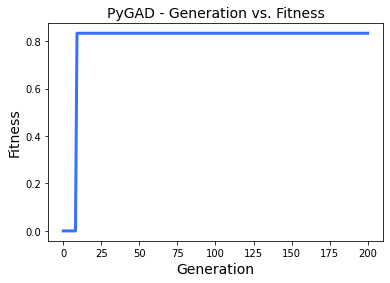

Parameters of the best solution : go
Fitness value of the best solution = 0.8333333333333333
Index of the best solution : 0


In [474]:
ga_instance.plot_fitness()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
key_sol=""
alphabet = list(string.ascii_lowercase)
for i in solution:
    key_sol += alphabet[i]
print("Parameters of the best solution : {key_sol}".format(key_sol=key_sol))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

In [471]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Best fitness value reached after 9 generations.


In [499]:
alphabet = list(string.ascii_lowercase)
print(alphabet[6])
print(alphabet.index('g'))

g
6
